<a href="https://colab.research.google.com/github/saidabxl/test/blob/master/Exercise_habermanfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

'''downlaod haberman.csv from https://www.kaggle.com/gilsousa/habermans-survival-data-set'''
#Load haberman.csv into a pandas dataFrame.

 
df = pd.read_csv("haberman.csv")


# Data Description: 

-Age of the patients at time of operation (numerical)
-Patient's year of operation (year - 1900, numerical)
-Number of positive axillary nodes detected (numerical)
-Survivors status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years.

In [3]:
#column names not mentioned so will add headers to the columns.
df.columns = ["Patient_age","Year_of_operation","Axillary nodes","Survival status"]
print (df.columns)

Index(['Patient_age', 'Year_of_operation', 'Axillary nodes',
       'Survival status'],
      dtype='object')


In [4]:
df.head()

,Patient_age,Year_of_operation,Axillary nodes,Survival status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
Patient_age          305 non-null int64
Year_of_operation    305 non-null int64
Axillary nodes       305 non-null int64
Survival status      305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


In [6]:
df.shape

(305, 4)

In [7]:
df['Survival status'].value_counts()

1    224
2     81
Name: Survival status, dtype: int64

# Observation:

305 observations in the dataset and classified into two classes. 224 patients of class 1, are those who survived, 81 patients of class 2, are those who are not survived.


In [8]:
print(df.describe())

#Statistics

       Patient_age  Year_of_operation  Axillary nodes  Survival status
count   305.000000         305.000000      305.000000       305.000000
mean     52.531148          62.849180        4.036066         1.265574
std      10.744024           3.254078        7.199370         0.442364
min      30.000000          58.000000        0.000000         1.000000
25%      44.000000          60.000000        0.000000         1.000000
50%      52.000000          63.000000        1.000000         1.000000
75%      61.000000          66.000000        4.000000         2.000000
max      83.000000          69.000000       52.000000         2.000000


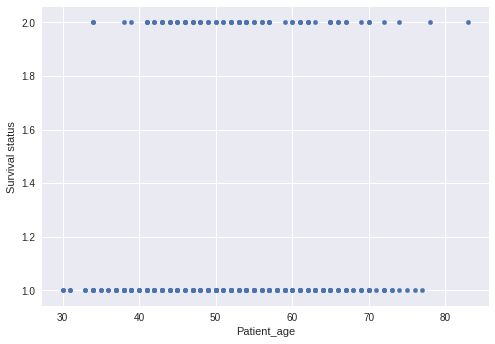

In [9]:
df.plot(kind='scatter', x='Patient_age', y='Survival status') ;

plt.show()

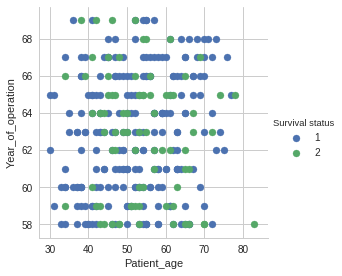

In [10]:
 # 2-D Scatter plot  

sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Survival status", size=4) \
   .map(plt.scatter, "Patient_age", "Year_of_operation") \
   .add_legend();
plt.show();



# Observation:
-Data overlapped and difficult to separate. 

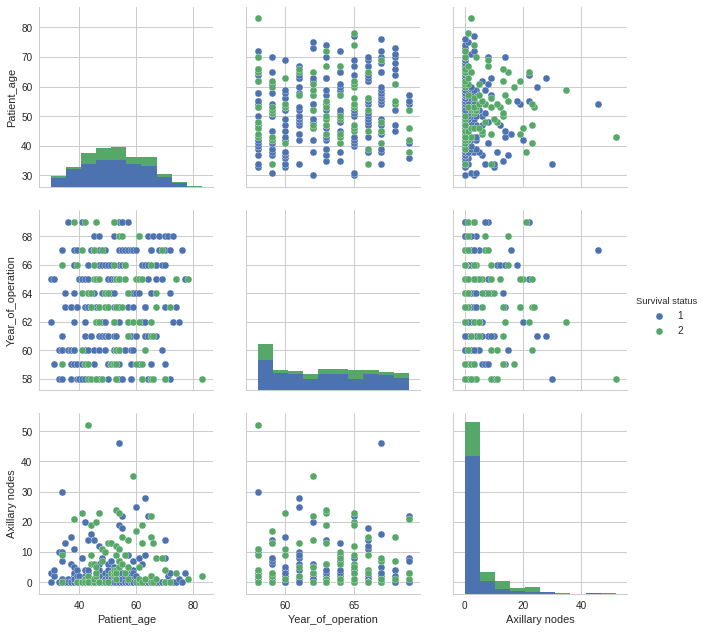

In [11]:
# pairwise scatter plot: Pair-Plot

plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="Survival status", size=3, 
             vars=["Patient_age","Year_of_operation","Axillary nodes"]);
plt.show()

#Relations between Axillary nodes,patient age and survival status.

# Observation:
looks like we cannot distinguish the data easily as most of them are overlapping.

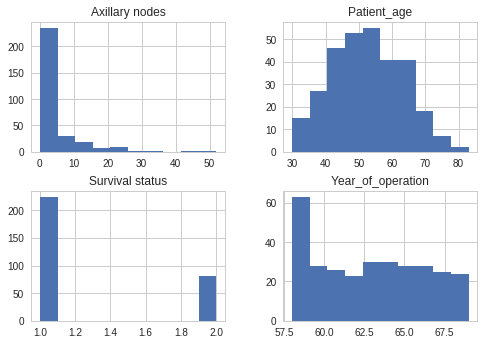

In [12]:
# histograms
df.hist()
plt.show()

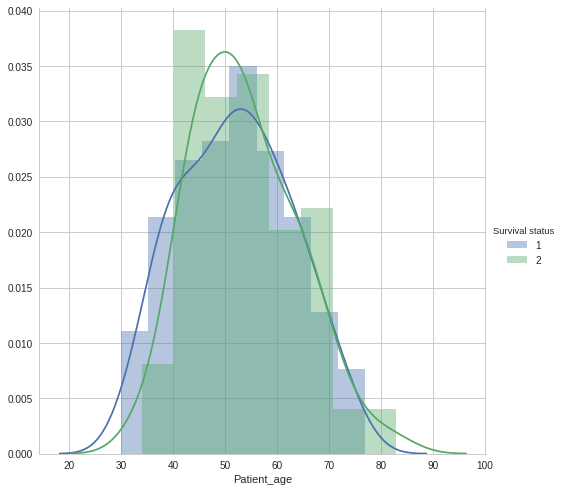

In [13]:
sns.FacetGrid(df, hue = "Survival status", size = 7).map(sns.distplot, "Patient_age").add_legend()
plt.show()

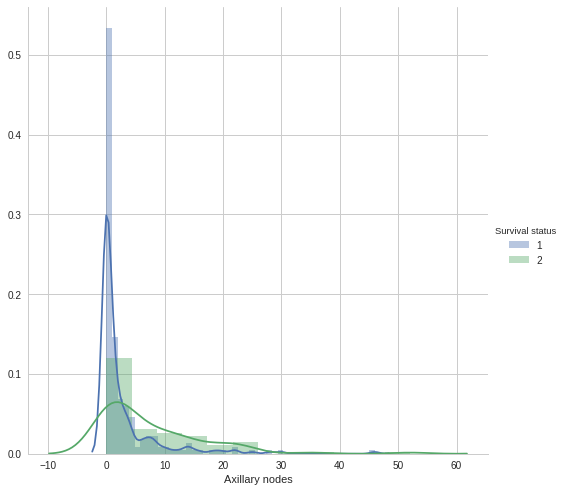

In [14]:
sns.FacetGrid(df, hue = "Survival status", size = 7).map(sns.distplot, "Axillary nodes").add_legend()
plt.show()

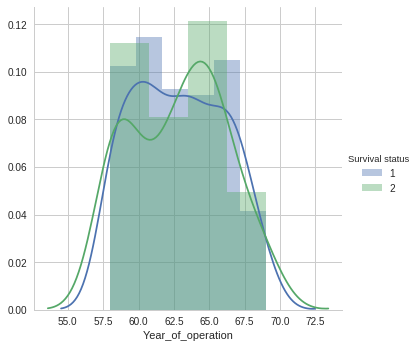

In [15]:
sns.FacetGrid(df, hue = "Survival status", size = 5).map(sns.distplot, "Year_of_operation").add_legend()
plt.show()

#mean will be a right measure of the data.

In [16]:
print("Mean age of patients who survived:", round(np.mean(df[df['Survival status'] == 1]['Patient_age'])))
print("Mean age of patients who aren't survived:", round(np.mean(df[df['Survival status'] == 2]['Patient_age'])))

Mean age of patients who survived: 52.0
Mean age of patients who aren't survived: 54.0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


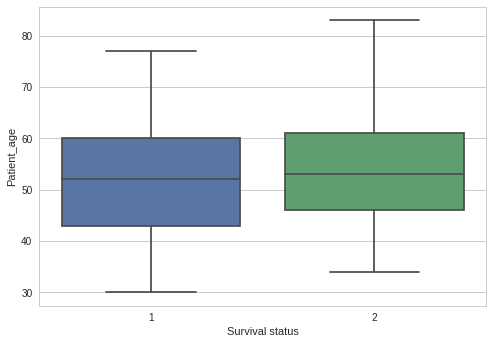

In [17]:
sns.boxplot(x='Survival status',y='Patient_age', data=df)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


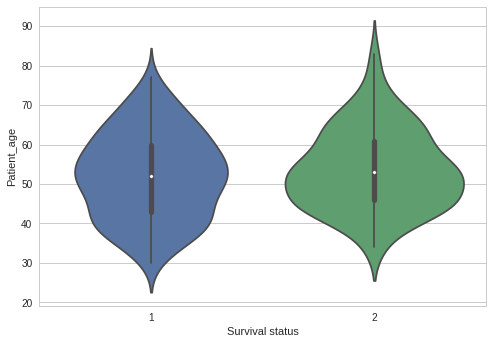

In [18]:
sns.violinplot(x="Survival status", y="Patient_age", data=df, size=8)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


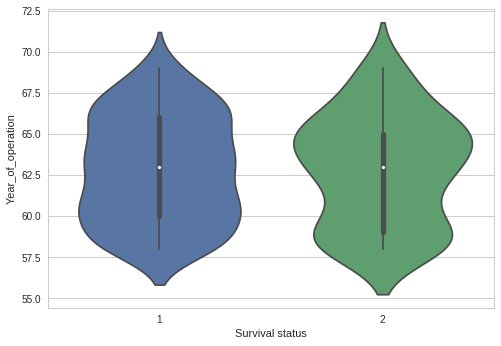

In [19]:
sns.violinplot(x="Survival status", y="Year_of_operation", data=df, size=8)
plt.show()

# Observation: 
Patients who are not survived have age between 46-62,year between 59-65 and the patients who survived have age between 42-60, year between 60-66.

# Conclussions 
Imbalanced dataset.

The data is not balanced, we can see 224 patients survived more than 5 years and 81 patients died within 5 years.